<a href="https://colab.research.google.com/github/LakshyaMalhotra/time-series-analysis/blob/main/time_series_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# library imports
import os
import gc
import datetime

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# plot formatting
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 14
sns.set_palette('Set2')
colors = list(sns.color_palette('Set2'))

In [3]:
def convert_to_dt(x):
    return datetime.datetime.strptime(x, '%m/%d/%Y')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', 
                 parse_dates=['Quarter'], date_parser=convert_to_dt)
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [6]:
def missing_values(df):
    data = pd.DataFrame(df.isnull().sum())
    data.columns = ['# missing']
    data['% missing'] = np.round((100 * data['# missing'])/df.shape[0], 2)
    return data

In [7]:
# printing basic info about the data
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')
print(f"\nFeatures:\n{'-'*10}\n{df.columns.tolist()}")
print(f'\nMissing values:\n{"-"*15}\n{missing_values(df)}')
print(f'\nUnique values:\n{"-"*15}\n{df.nunique()}')

Rows: 61
Columns: 3

Features:
----------
['Quarter', 'Revenue', 'Net Income']

Missing values:
---------------
            # missing  % missing
Quarter             0        0.0
Revenue             0        0.0
Net Income          0        0.0

Unique values:
---------------
Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [8]:
df.set_index('Quarter', inplace=True)

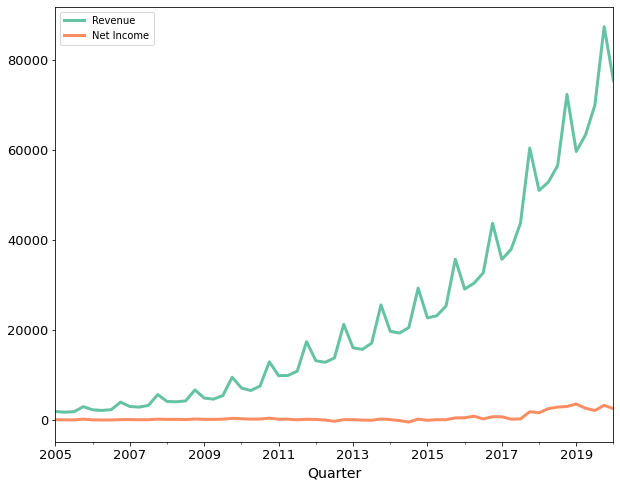

In [16]:
df.plot(lw=3);

In [20]:
fig = go.Figure()
trace = go.Scatter(x=df.index, y=df.Revenue, name='Amazon Revenue over the years', 
                   text=df.index, mode='lines', marker=dict(color='rgb(102,194,165)'))
fig.add_trace(trace)

layout = dict(
    title='Amazon revenue over the years',
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                 dict(count=1, label='1y', step='year', stepmode='backward'),
                 dict(count=3, label='3y', step='year', stepmode='backward'),
                 dict(count=5, label='5y', step='year', stepmode='backward'),
                 dict(step='all'),
                ]
            )
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    )
)
fig.update_layout(layout)
fig.show()

We can see the time-series almost stays stationary till about year 2010 but afterwards it is non-stationary as we can see from the non-linear trend.

Let's try to explore this further with the help of hypothesis testing:

$H_{0}$ : data is stationary

$H_{a}$ : data is non-stationary